In [362]:
import numpy as np
import os
import matplotlib.pyplot as plt
import librosa
import IPython.display

In [363]:
# has to be set in order to show the image in notebook
%matplotlib inline 

In [364]:
try:
    os.chdir("./Resources")
except:
    print os.getcwd()
    pass

y, sr = librosa.load("./and-snare-ride.wav", duration=8)
# returns a numpy array series => assigned to y
#   and the sampling rate of y => assigned to sr (signal rate)

IPython.display.Audio(data=y, rate=sr)

/Users/muddCS15/Documents/IPYNotebooks/Resources


In [365]:
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

Estimated tempo: 112.35 beats per minute


In [366]:
# Save the frames to CSV
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

<matplotlib.colorbar.Colorbar instance at 0x10f833d40>

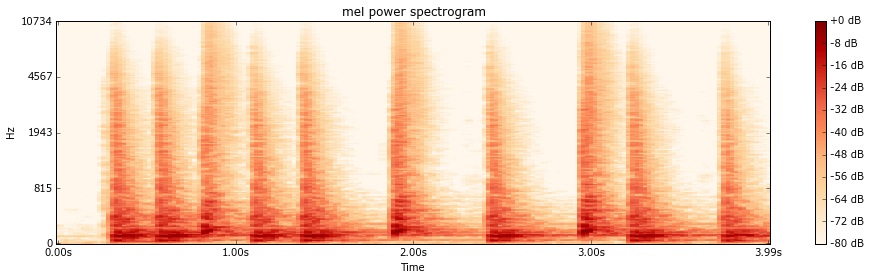

In [375]:
# Extract Mel Spectrogram
beat_spectro = librosa.feature.melspectrogram(y, sr=sr, n_mels=512) 

# Convert to log scale (dB). We'll use the peak power as reference.
log_scale = librosa.logamplitude(beat_spectro, ref_power=np.max)

plt.figure(figsize=(16,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('mel power spectrogram')
plt.colorbar(format='%+02.0f dB')

In [368]:
onset_frames = librosa.onset.onset_detect(y=y, sr=sr)

In [378]:
onset_times  = librosa.frames_to_time(onset_frames, sr=sr)
print  "There are %d onsets" % len(onset_times) 
print o_env
o_env = librosa.onset.onset_strength(y, sr=sr)

There are 27 onsets
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   4.44356966e-01   9.84801458e-01   1.52442222e-01
   3.82883681e-03   1.28099984e-02   1.40992596e-01   4.50973234e-02
   1.98350377e+01   8.72892104e+00   7.00093126e-01   2.96027494e-01
   6.86751047e-01   5.83825646e-01   6.32551968e-01   5.58370690e-01
   3.33178529e-01   6.02393519e-01   5.97009931e-01   6.00600335e-01
   7.27552614e-01   7.63482561e-01   4.73279165e+00   2.51384089e+00
   3.52401813e-01   3.60640007e-01   3.94466516e-01   5.31212136e-01
   7.40359909e-01   4.61081899e-01   4.77405371e-01   4.99354693e-01
   7.84769747e-01   5.23750773e-01   9.84925799e-01   6.62319996e+00
   2.83997414e+00   4.41466087e-01   3.79734702e-01   4.40522465e-01
   5.92569117e-01   6.30187731e-01   3.76222313e-01   5.83501488e-01
   4.78145551e-01   5.09312975e-01   6.15914224e-01   6.10394107e-01
   6.52928357e+00   9.86177226e+00   3.76263095e+00   2.75849105e-01
   1.57167422e

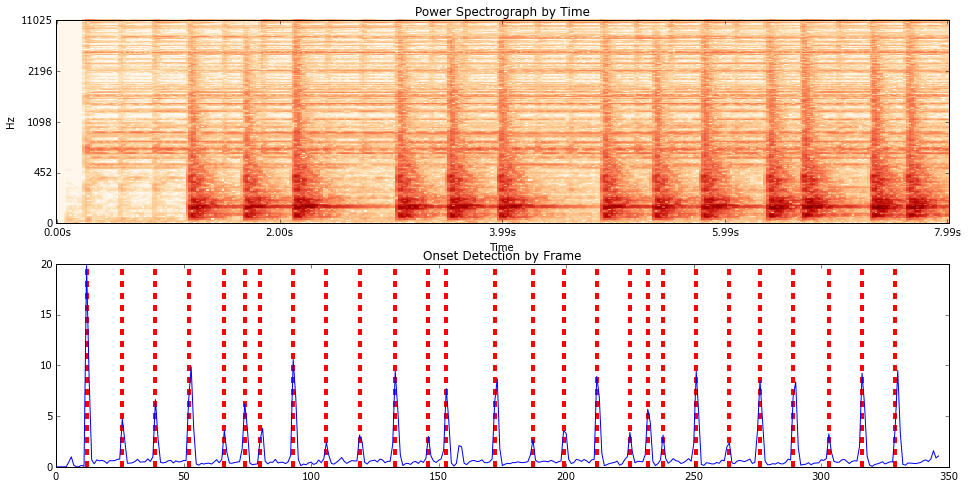

In [381]:
D = np.abs(librosa.stft(y))**2
plt.figure(figsize=(16,8)) 

plt.subplot(2, 1, 1)
plt.title('Power Spectrograph by Time')
librosa.display.specshow(librosa.logamplitude(D, ref_power=np.max), x_axis='time', y_axis='log')

plt.subplot(2, 1, 2)
plt.title('Onset Detection by Frame')
plt.plot(o_env, label="Onset strength")
plt.vlines(onset_frames, 0, o_env.max(), color='r', linewidth=4.00, linestyles="--")

In [415]:
for frame in onset_frames:
    print np.abs(D[:, frame])
    """ 
    # uncomment block for all granular values
    for i in np.abs(D[:, frame]):
        print i, 
    """
    print "\n"

[ 0.01169021  0.07026133  0.19863138 ...,  0.62226093  0.10619336
  0.00750579]


[ 0.03321007  0.01879264  0.02713634 ...,  0.21364166  0.03264903
  0.19622047]


[ 0.01017668  0.00163892  0.04595115 ...,  0.16929434  0.05637056
  0.01820828]


[ 0.03254754  0.26588851  0.19406658 ...,  0.58196366  0.43869331
  0.4826909 ]


[ 0.01486944  0.02027936  0.03406847 ...,  0.26949817  0.05575914
  0.26050955]


[  2.17054393e-02   6.16215989e-02   4.90373820e-01 ...,   4.35641850e-05
   8.17420147e-03   3.29451114e-02]


[ 0.01577535  0.01743263  0.1873751  ...,  0.19433804  0.49598917
  0.3039861 ]


[ 0.01521087  0.16906333  0.88302523 ...,  0.2544187   0.61009187
  1.31058824]


[ 0.00084511  0.03590221  0.08066913 ...,  0.04127514  0.00956868
  0.06033868]


[ 0.01380229  0.03272043  0.08123001 ...,  0.14051713  0.02410871
  0.02099271]


[ 0.00300339  0.13236699  0.6885938  ...,  0.08679163  0.00557902
  0.0023771 ]


[ 0.0067133   0.00411887  0.0026024  ...,  0.04363897  0.05059798
  